In [ ]:
# Step 1: Import libraries
import pandas as pd
import os

# Step 2: Define the folder path where files are uploaded
folder_path = '/content/Sales_Data'

# Step 3: Get the list of all files in the folder
all_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

# Step 4: Combine all CSV files into a single DataFrame
data_frames = []
for file in all_files:
    df = pd.read_csv(file)
    data_frames.append(df)

# Step 5: Concatenate all DataFrames
sales_data = pd.concat(data_frames, ignore_index=True)

# Step 6: Display basic information to confirm successful loading
print(sales_data.info())  # Check for null values and data types
sales_data.head()  # Preview the first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB
None


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [ ]:
# Drop rows with NaN values
sales_data.dropna(inplace=True)

# Check for missing values after dropping NaNs
print(sales_data.isnull().sum())


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


In [ ]:
sales_data = sales_data[sales_data['Order Date'].str[0:2]!='Or']

In [ ]:
sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'])
sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'])

In [ ]:
# Convert columns to appropriate data types
sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'])
sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'])
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

# Verify the data types after conversion
print(sales_data.dtypes)


<ipython-input-5-e56052289b3a>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])


Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [ ]:
# Extract Month from 'Order Date'
sales_data['Month'] = sales_data['Order Date'].dt.month

# Extract City from 'Purchase Address'
sales_data['City'] = sales_data['Purchase Address'].apply(lambda x: f"{x.split(',')[1].strip()} ({x.split(',')[2][:2].strip()})")

# Preview the updated DataFrame
sales_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,Austin (T)
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,Austin (T)
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,Austin (T)
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",3,San Francisco (C)
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",3,San Francisco (C)


In [ ]:
# Calculate Total Sales
sales_data['Total Sales'] = sales_data['Quantity Ordered'] * sales_data['Price Each']

# Preview the DataFrame
sales_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Total Sales
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,Austin (T),700.00
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,Austin (T),14.95
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,Austin (T),23.98
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",3,San Francisco (C),99.99
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",3,San Francisco (C),379.99


General Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int32         
 7   City              185950 non-null  object        
 8   Total Sales       185950 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 13.5+ MB
None

Summary Statistics:
       Quantity Ordered     Price Each                     Order Date  \
count     185950.000000  185950.000000                         185950   
mean

<ipython-input-7-eb3dbe3c5255>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Total Sales', data=monthly_sales, palette='viridis')


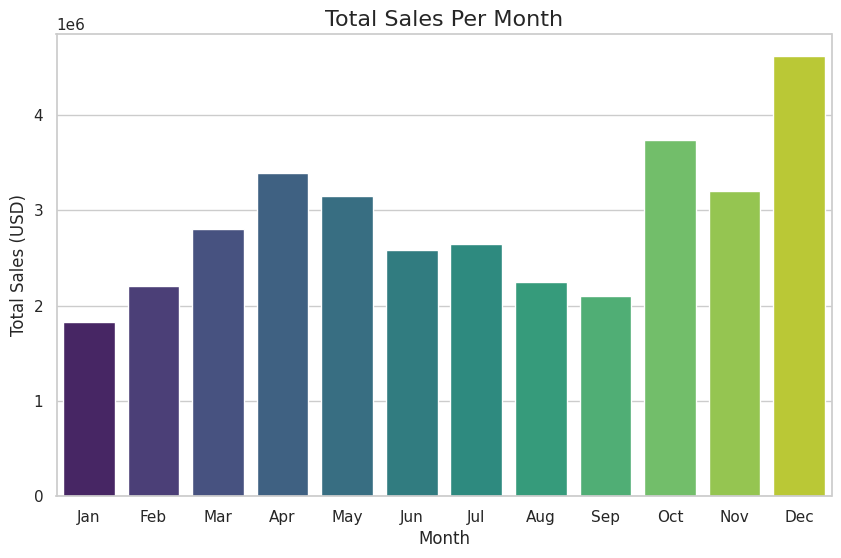

<ipython-input-7-eb3dbe3c5255>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Product', x='Quantity Ordered', data=product_sales, palette='cubehelix')


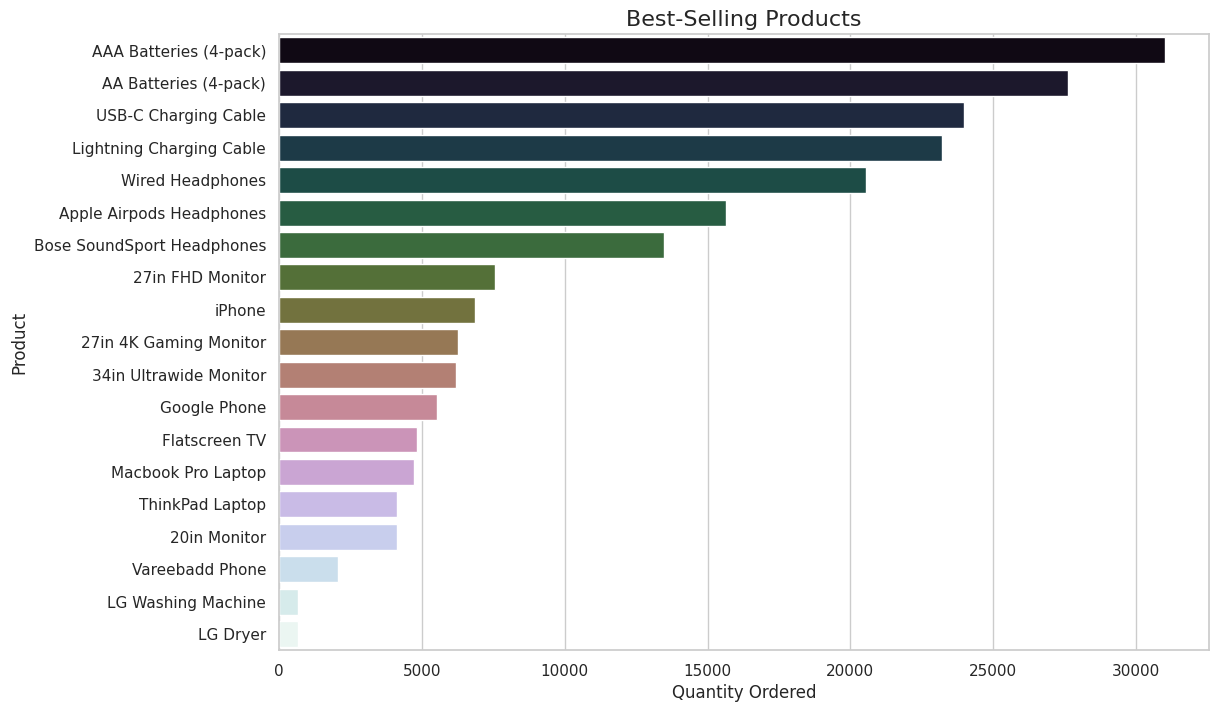

<ipython-input-7-eb3dbe3c5255>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Total Sales', data=city_sales, palette='mako')


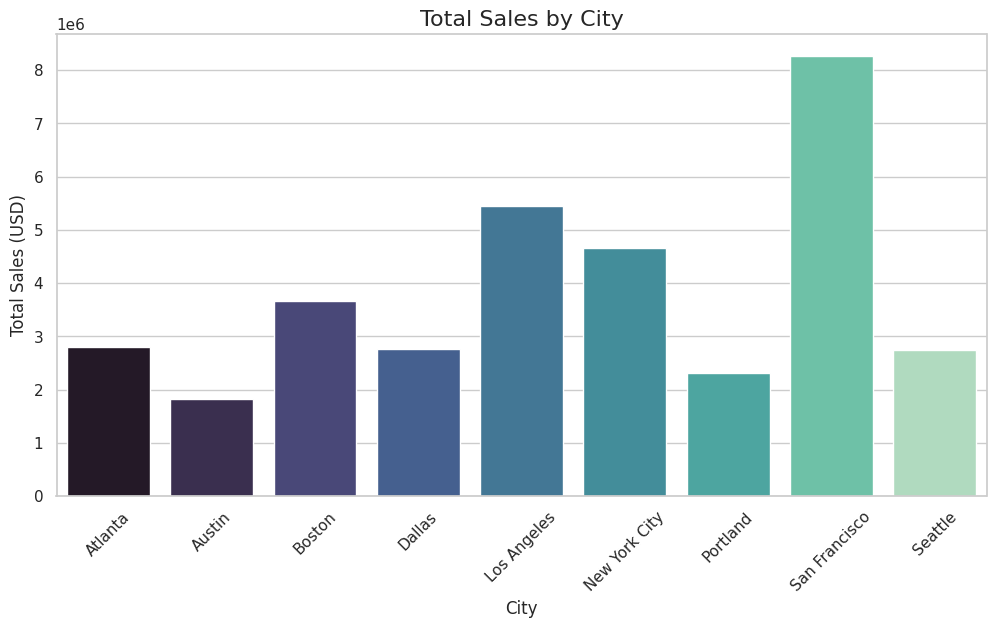

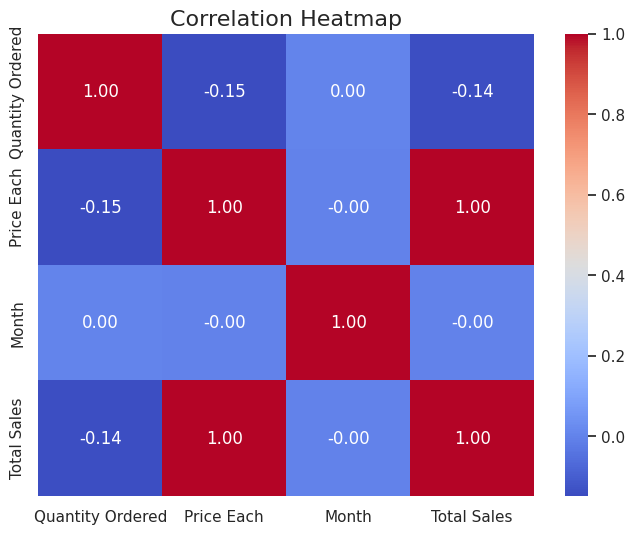

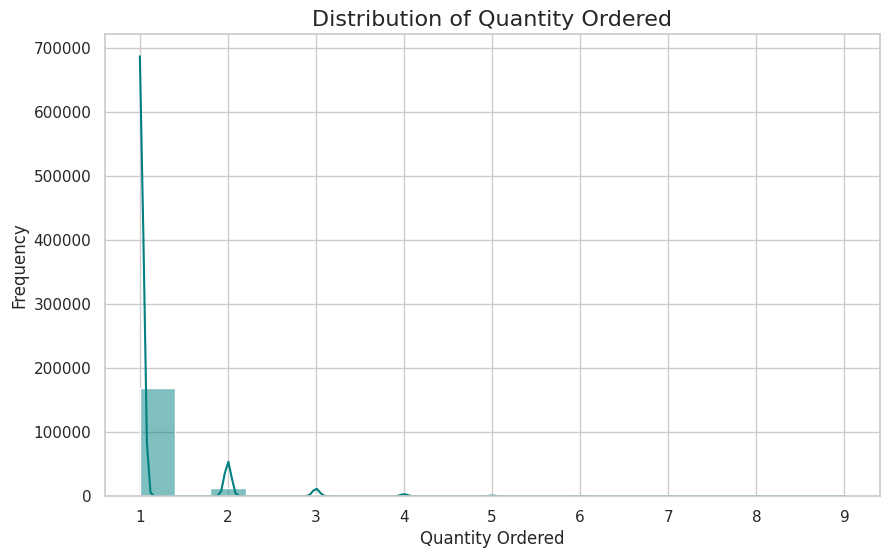

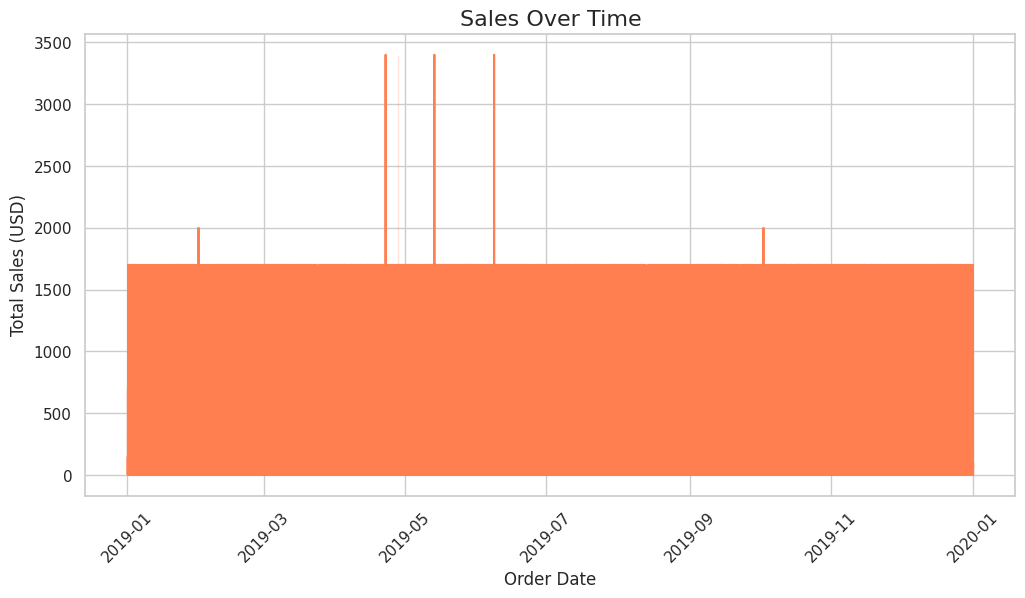

Top 5 Purchase Addresses by Total Sales:
Purchase Address
668 Park St, San Francisco, CA 94016    4379.99
795 1st St, Atlanta, GA 30301           4100.00
391 1st St, Seattle, WA 98101           4100.00
10 1st St, San Francisco, CA 94016      4000.00
731 11th St, New York City, NY 10001    3919.88
Name: Total Sales, dtype: float64

Top 5 Products by Total Revenue:
Product
Macbook Pro Laptop        8037600.00
iPhone                    4794300.00
ThinkPad Laptop           4129958.70
Google Phone              3319200.00
27in 4K Gaming Monitor    2435097.56
Name: Total Sales, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure correct data types
sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'], errors='coerce')
sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'], errors='coerce')

# Create a new column for Total Sales
sales_data['Total Sales'] = sales_data['Quantity Ordered'] * sales_data['Price Each']

# Convert 'Order Date' column to datetime
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], errors='coerce')

# Extract Month from 'Order Date'
sales_data['Month'] = sales_data['Order Date'].dt.month

# Set style for plots
sns.set(style="whitegrid")

# 1. General Information About the Dataset
print("General Dataset Info:")
print(sales_data.info())
print("\nSummary Statistics:")
print(sales_data.describe())

# 2. Total Sales per Month
monthly_sales = sales_data.groupby('Month')['Total Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Total Sales', data=monthly_sales, palette='viridis')
plt.title('Total Sales Per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# 3. Best-Selling Products
product_sales = sales_data.groupby('Product')['Quantity Ordered'].sum().reset_index()
product_sales = product_sales.sort_values(by='Quantity Ordered', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(y='Product', x='Quantity Ordered', data=product_sales, palette='cubehelix')
plt.title('Best-Selling Products', fontsize=16)
plt.xlabel('Quantity Ordered', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.show()

# 4. Total Sales by City
# To extract City from 'Purchase Address', we'll need to assume the address is in a consistent format (i.e., city is before state)
sales_data['City'] = sales_data['Purchase Address'].apply(lambda x: x.split(',')[1].strip() if isinstance(x, str) else None)

city_sales = sales_data.groupby('City')['Total Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Total Sales', data=city_sales, palette='mako')
plt.title('Total Sales by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Select only the numeric columns for correlation calculation
numeric_columns = sales_data.select_dtypes(include=['number']).columns

# Calculate the correlation matrix for numeric columns
corr_matrix = sales_data[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# 6. Distribution of Order Quantities
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['Quantity Ordered'], bins=20, kde=True, color='teal')
plt.title('Distribution of Quantity Ordered', fontsize=16)
plt.xlabel('Quantity Ordered', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# 7. Distribution of Sales Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_data, x='Order Date', y='Total Sales', color='coral')
plt.title('Sales Over Time', fontsize=16)
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# 8. Top 5 Purchase Addresses by Total Sales
top_addresses = sales_data.groupby('Purchase Address')['Total Sales'].sum().sort_values(ascending=False).head(5)
print("Top 5 Purchase Addresses by Total Sales:")
print(top_addresses)

# 9. Top 5 Products by Total Revenue
top_products_revenue = sales_data.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Products by Total Revenue:")
print(top_products_revenue)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent itemsets found: 35
Top 10 Association Rules:
                antecedents               consequents   support  confidence  \
0              Google Phone      USB-C Charging Cable  0.005587    0.180551   
1      USB-C Charging Cable              Google Phone  0.005587    0.045619   
2                    iPhone  Lightning Charging Cable  0.005666    0.147807   
3  Lightning Charging Cable                    iPhone  0.005666    0.046797   
4      USB-C Charging Cable           Vareebadd Phone  0.002062    0.016838   
5           Vareebadd Phone      USB-C Charging Cable  0.002062    0.178208   

       lift  
0  1.474120  
1  1.474120  
2  1.220804  
3  1.220804  
4  1.454996  
5  1.454996  


<ipython-input-13-a743b1621aee>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_display['antecedents'] = rules_display['antecedents'].apply(lambda x: ', '.join(list(x)))
<ipython-input-13-a743b1621aee>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_display['consequents'] = rules_display['consequents'].apply(lambda x: ', '.join(list(x)))


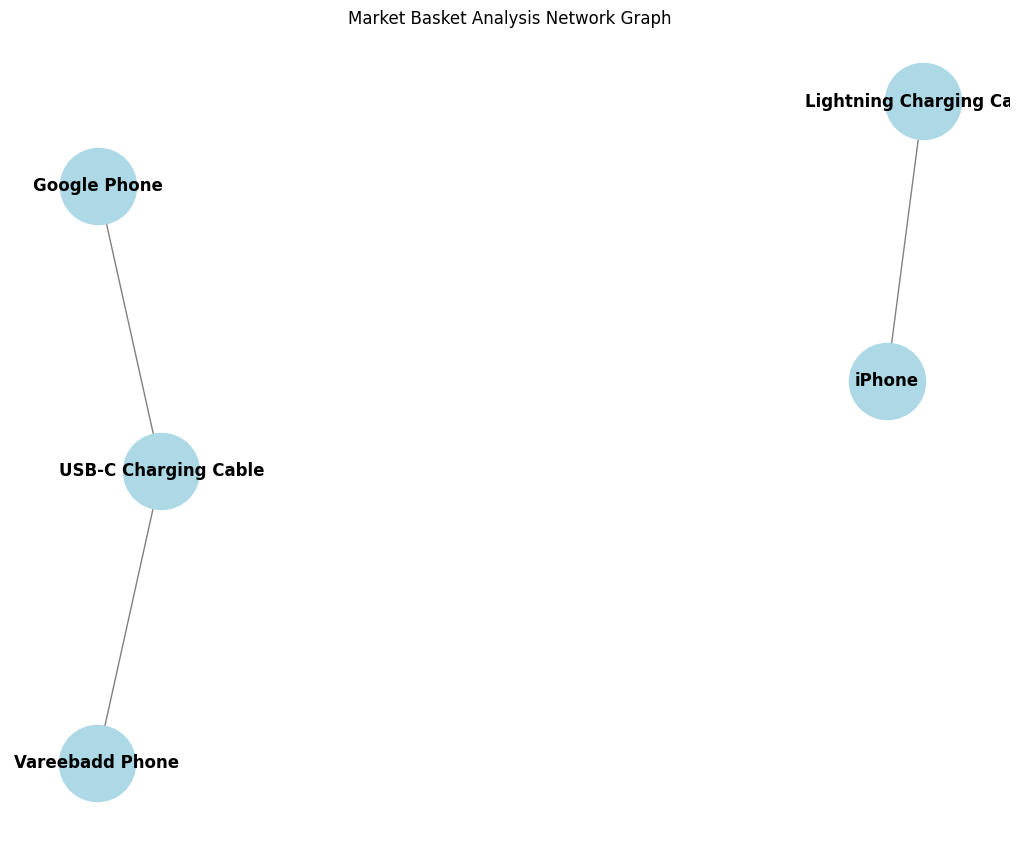

In [ ]:
# Further lowering min_support for more frequent itemsets
frequent_itemsets = apriori(basket_data, min_support=0.0005, use_colnames=True)
print("Frequent itemsets found:", len(frequent_itemsets))

# Generate association rules again based on lift
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display top rules
if not rules.empty:
    rules_display = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
    rules_display['antecedents'] = rules_display['antecedents'].apply(lambda x: ', '.join(list(x)))
    rules_display['consequents'] = rules_display['consequents'].apply(lambda x: ', '.join(list(x)))

    print("Top 10 Association Rules:")
    print(rules_display.head(10))
else:
    print("No rules found with the new min_support.")
import networkx as nx
import matplotlib.pyplot as plt

# Check if the rules have antecedents and consequents to form edges
if not rules.empty:
    G = nx.Graph()

    # Create edges between antecedents and consequents
    for _, row in rules.iterrows():
        antecedents = list(row['antecedents'])
        consequents = list(row['consequents'])

        for antecedent in antecedents:
            for consequent in consequents:
                # Add edge to graph (if it doesn't already exist)
                G.add_edge(antecedent, consequent, weight=row['lift'])

    # Draw the graph
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, k=0.5, iterations=50)
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=12, font_weight='bold', edge_color='gray')

    # Display graph
    plt.title("Market Basket Analysis Network Graph")
    plt.show()
else:
    print("No association rules to visualize.")


Timeseries

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


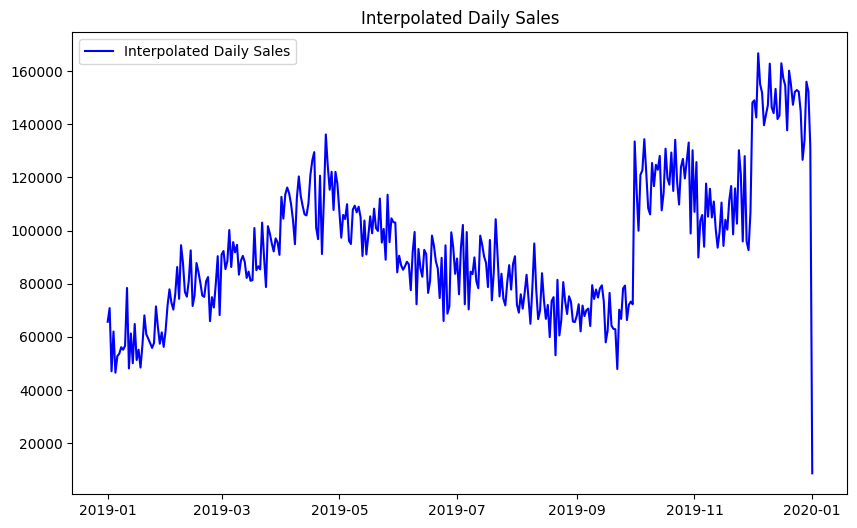

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Assuming 'sales_data' is already loaded and preprocessed
# Aggregating sales data daily
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
daily_sales = sales_data.groupby(sales_data['Order Date'].dt.date)['Total Sales'].sum()
daily_sales = daily_sales.reset_index()
daily_sales.columns = ['Date', 'Sales']
daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])

# Setting 'Date' as index for time series analysis
time_series = daily_sales.set_index('Date')['Sales']

# Interpolating missing values
time_series = time_series.asfreq('D')  # Ensures a daily frequency
time_series = time_series.interpolate(method='linear')

# Plot interpolated time series
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Interpolated Daily Sales', color='blue')
plt.title('Interpolated Daily Sales')
plt.legend()
plt.show()


In [ ]:
# Perform ADF test
adf_result = adfuller(time_series)
print("ADF Statistic:", adf_result[0])
print("p-Value:", adf_result[1])

# Check stationarity
if adf_result[0] < 0 and adf_result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary. Differencing may be needed.")


ADF Statistic: -2.3508591590746564
p-Value: 0.1560888501412367
The series is not stationary. Differencing may be needed.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


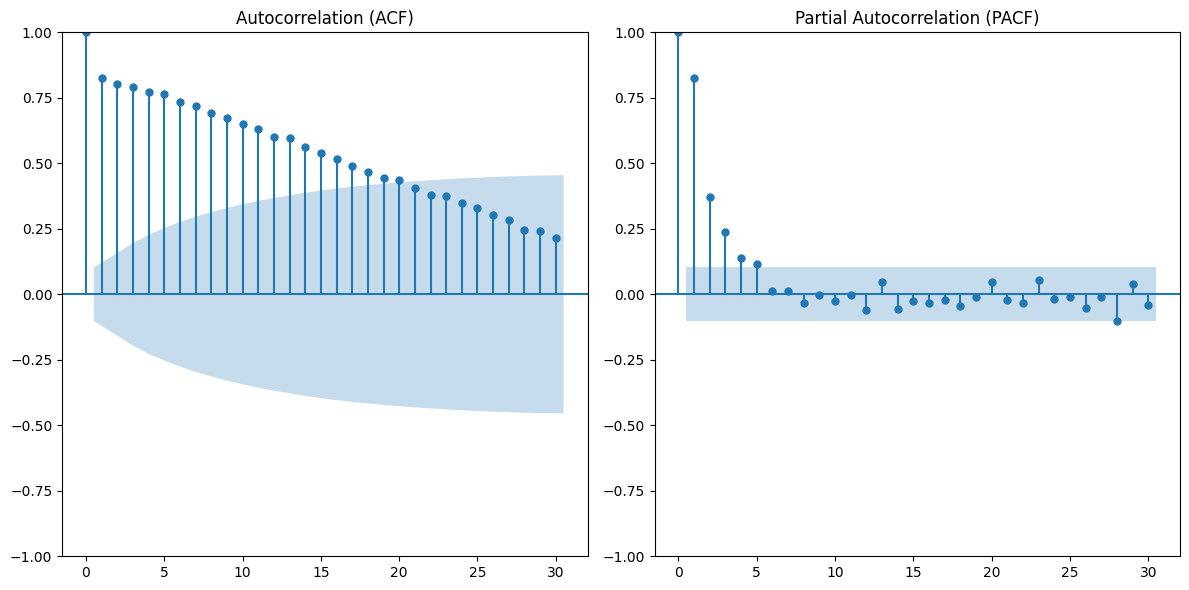

In [ ]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(time_series, ax=plt.gca(), lags=30)
plt.title('Autocorrelation (ACF)')
plt.subplot(122)
plot_pacf(time_series, ax=plt.gca(), lags=30)
plt.title('Partial Autocorrelation (PACF)')
plt.tight_layout()
plt.show()


In [ ]:
# Fit ARIMA model (adjust p, d, q based on ACF and PACF observations)
p, d, q = 6, 1, 6  # Example values based on ACF and PACF
model = ARIMA(time_series, order=(p, d, q))
arima_result = model.fit()

# Display model summary
print(arima_result.summary())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  366
Model:                 ARIMA(6, 1, 6)   Log Likelihood               -3969.129
Date:                Tue, 19 Nov 2024   AIC                           7964.258
Time:                        19:46:54   BIC                           8014.957
Sample:                    01-01-2019   HQIC                          7984.406
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1692      1.561     -0.108      0.914      -3.230       2.891
ar.L2         -0.1757      0.271     -0.649      0.517      -0.707       0.355
ar.L3         -0.0466      0.368     -0.127      0.8

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Predictions and residuals
fitted_values = arima_result.fittedvalues
residuals = time_series - fitted_values

# RMSE and MAPE
rmse = np.sqrt(mean_squared_error(time_series, fitted_values))
mape = mean_absolute_percentage_error(time_series, fitted_values)

print("RMSE:", rmse)
print("MAPE:", mape)


RMSE: 13207.209011188806
MAPE: 0.1328005946263631


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


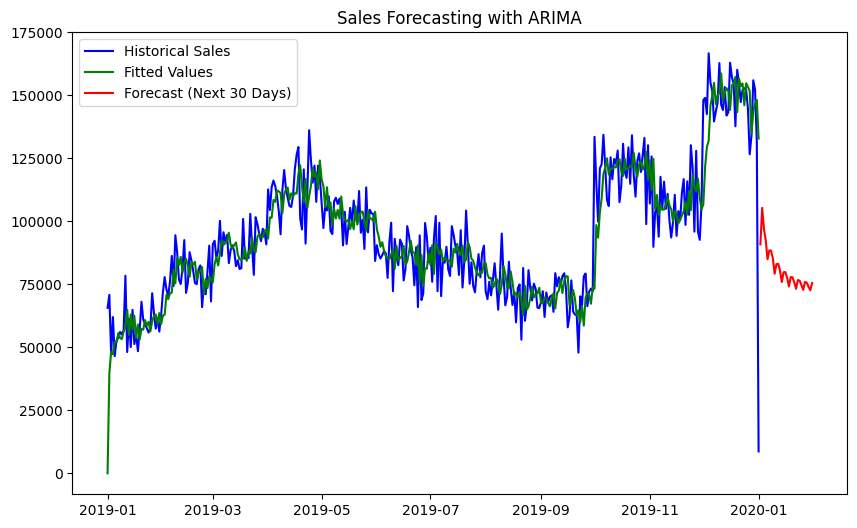

In [ ]:
# Forecast the next 30 days
forecast = arima_result.forecast(steps=30)

# Plot historical sales and forecasts
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Historical Sales', color='blue')
plt.plot(fitted_values, label='Fitted Values', color='green')
plt.plot(forecast, label='Forecast (Next 30 Days)', color='red')
plt.title('Sales Forecasting with ARIMA')
plt.legend()
plt.show()


***sku***

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Overall Classification:
  combined_class                                            Product
0          GS-GQ  20in Monitor, 27in 4K Gaming Monitor, 27in FHD...
1          GS-MQ       Macbook Pro Laptop, Lightning Charging Cable
Monthly Classification:
                                                   GS-GQ  \
Month                                                      
1      20in Monitor, 27in 4K Gaming Monitor, 27in FHD...   
2      20in Monitor, 27in 4K Gaming Monitor, 27in FHD...   
3      20in Monitor, 27in 4K Gaming Monitor, 27in FHD...   
4      20in Monitor, 27in 4K Gaming Monitor, 27in FHD...   
5      20in Monitor, 27in 4K Gaming Monitor, 27in FHD...   
6      20in Monitor, 27in 4K Gaming Monitor, 27in FHD...   
7      20in Monitor, 27in 4K Gaming Monitor, 27in FHD...   
8      20in Monitor, 27in 4K Gaming Monitor, 27in FHD...   
9      20in Monitor, 27in 4K Gaming Monitor, 27in FHD...   
10     20in Monitor, 27in 4K Gaming Monitor, 27in FHD...   
11     20in Monitor, 27in 4K

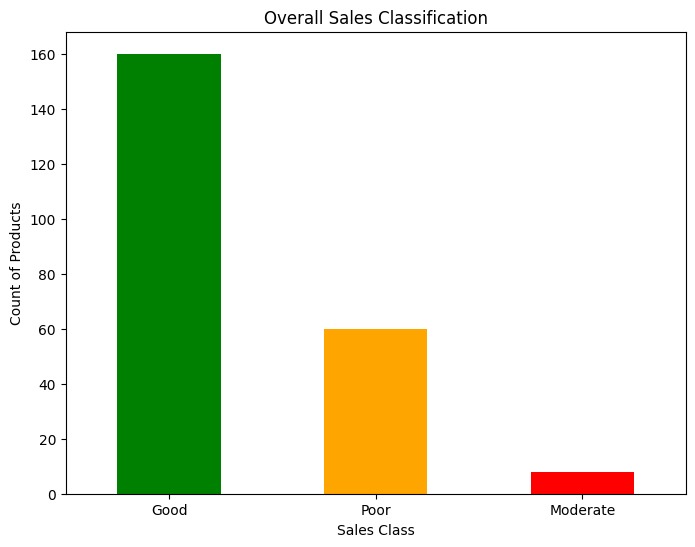

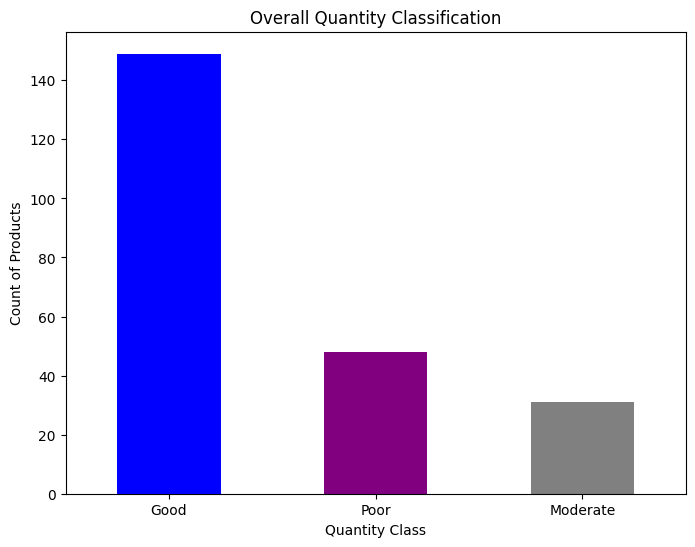

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Aggregate Monthly Sales and Quantities
monthly_performance = sales_data.groupby(['Month', 'Product']).agg({
    'Total Sales': 'sum',
    'Quantity Ordered': 'sum'
}).reset_index()  # Ensure a consistent flat index

# Rename columns for clarity
monthly_performance.rename(columns={'Total Sales': 'monthly_sales', 'Quantity Ordered': 'monthly_quantity'}, inplace=True)

# Step 2: Perform ABC Analysis for Sales
monthly_performance['sales_cumsum'] = (
    monthly_performance.groupby('Month')['monthly_sales'].cumsum().reset_index(drop=True)
)
monthly_performance['sales_cum_percent'] = (
    monthly_performance.groupby('Month')['monthly_sales']
    .apply(lambda x: x.cumsum() / x.sum() * 100).reset_index(drop=True)
)

# Classify products based on cumulative sales percentage
def classify_sales(percent):
    if percent <= 70:
        return 'Good'
    elif percent <= 80:
        return 'Moderate'
    else:
        return 'Poor'

monthly_performance['sales_class'] = monthly_performance['sales_cum_percent'].apply(classify_sales)

# Step 3: Perform ABC Analysis for Quantities
monthly_performance['quantity_cumsum'] = (
    monthly_performance.groupby('Month')['monthly_quantity'].cumsum().reset_index(drop=True)
)
monthly_performance['quantity_cum_percent'] = (
    monthly_performance.groupby('Month')['monthly_quantity']
    .apply(lambda x: x.cumsum() / x.sum() * 100).reset_index(drop=True)
)

# Classify products based on cumulative quantity percentage
def classify_quantity(percent):
    if percent <= 70:
        return 'Good'
    elif percent <= 80:
        return 'Moderate'
    else:
        return 'Poor'

monthly_performance['quantity_class'] = monthly_performance['quantity_cum_percent'].apply(classify_quantity)

# Step 4: Combine Sales and Quantity Classifications
def classify_combined(row):
    if row['sales_class'] == 'Good' and row['quantity_class'] == 'Good':
        return 'GS-GQ'  # Core Products
    elif row['sales_class'] == 'Good' and row['quantity_class'] == 'Moderate':
        return 'GS-MQ'  # Luxury Products
    elif row['sales_class'] == 'Moderate' and row['quantity_class'] == 'Good':
        return 'MS-GQ'  # Bulk Selling Products
    else:
        return None  # Ignore other combinations

monthly_performance['combined_class'] = monthly_performance.apply(classify_combined, axis=1)

# Step 5: Generate Overall Classification Table
overall_classification = monthly_performance.groupby('combined_class')['Product'].unique().reset_index()
overall_classification['Product'] = overall_classification['Product'].apply(lambda x: ', '.join(x))
print("Overall Classification:")
print(overall_classification)

# Generate Monthly Classification Table
monthly_classification = monthly_performance.groupby(['Month', 'combined_class'])['Product'].unique().reset_index()
monthly_classification['Product'] = monthly_classification['Product'].apply(lambda x: ', '.join(x))

# Pivot table to reorganize data
monthly_classification_pivot = monthly_classification.pivot(index='Month', columns='combined_class', values='Product').fillna('')

# Dynamically rename columns based on actual unique classifications
monthly_classification_pivot.columns = monthly_classification_pivot.columns.to_list()
print("Monthly Classification:")
print(monthly_classification_pivot)


# Step 7: Visualization for Sales and Quantity Classifications

# Overall Sales Classification
sales_class_counts = monthly_performance['sales_class'].value_counts()
plt.figure(figsize=(8, 6))
sales_class_counts.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Overall Sales Classification')
plt.xlabel('Sales Class')
plt.ylabel('Count of Products')
plt.xticks(rotation=0)
plt.show()

# Overall Quantity Classification
quantity_class_counts = monthly_performance['quantity_class'].value_counts()
plt.figure(figsize=(8, 6))
quantity_class_counts.plot(kind='bar', color=['blue', 'purple', 'gray'])
plt.title('Overall Quantity Classification')
plt.xlabel('Quantity Class')
plt.ylabel('Count of Products')
plt.xticks(rotation=0)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


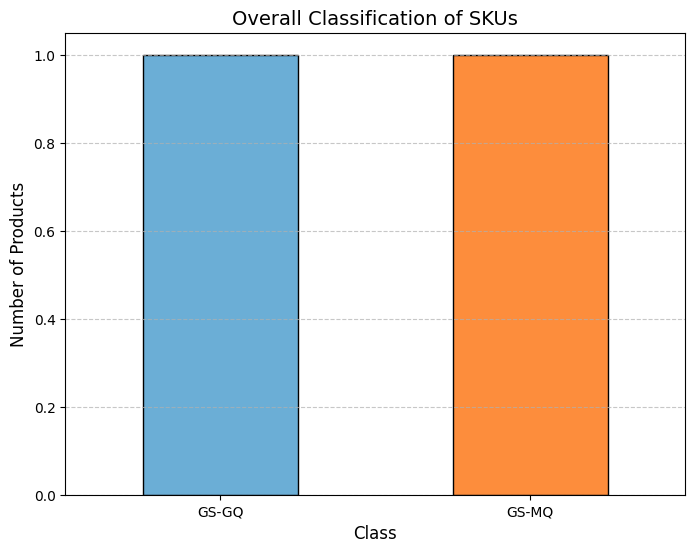

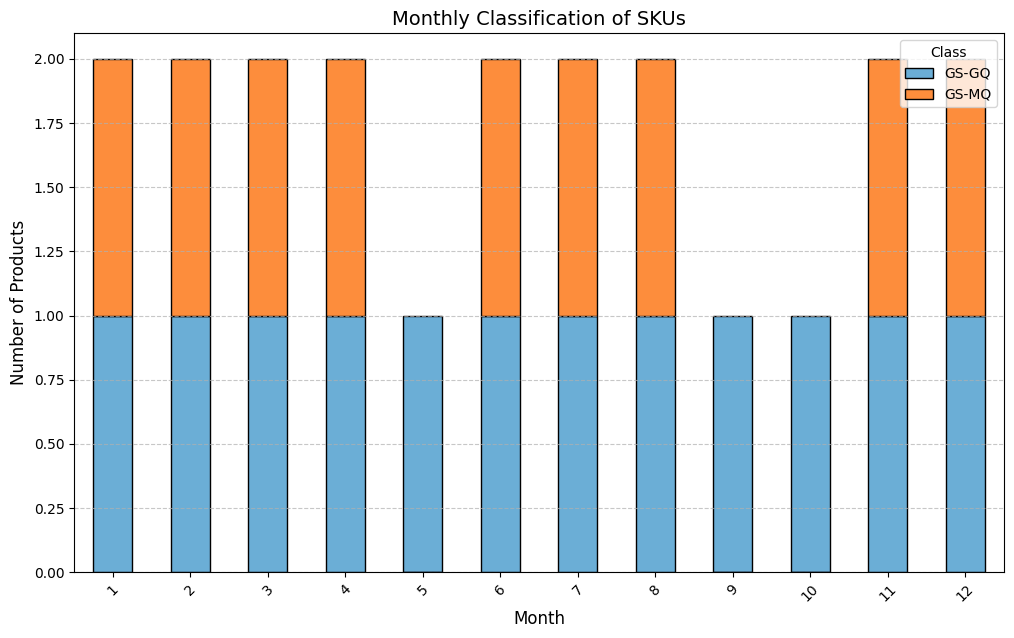

In [ ]:
import matplotlib.pyplot as plt

# Overall Classification Plot
overall_classification_counts = overall_classification.groupby('combined_class')['Product'].count()

plt.figure(figsize=(8, 6))
overall_classification_counts.plot(kind='bar', color=['#6baed6', '#fd8d3c'], edgecolor='black')
plt.title('Overall Classification of SKUs', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# Prepare data for the stacked bar chart
monthly_classification_counts = monthly_classification.groupby(['Month', 'combined_class'])['Product'].count().unstack(fill_value=0)

monthly_classification_counts.plot(kind='bar', stacked=True, figsize=(12, 7), color=['#6baed6', '#fd8d3c', '#31a354'], edgecolor='black')
plt.title('Monthly Classification of SKUs', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Class', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


***last part***

In [ ]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

# Extracting Hour of the day and Day of the week
sales_data['Hour'] = sales_data['Order Date'].dt.hour
sales_data['DayOfWeek'] = sales_data['Order Date'].dt.dayofweek  # Monday = 0, Sunday = 6
sales_data['Day'] = sales_data['Order Date'].dt.date

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


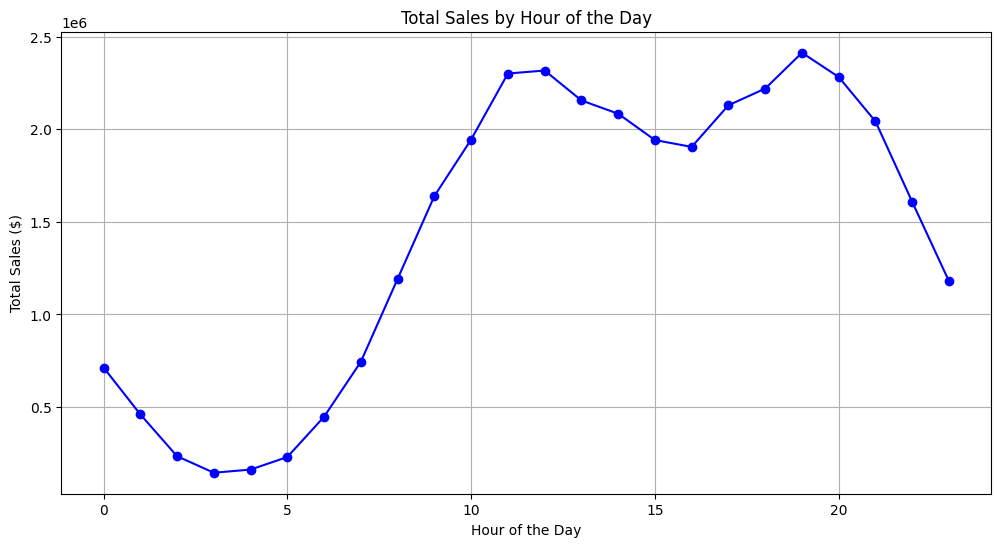

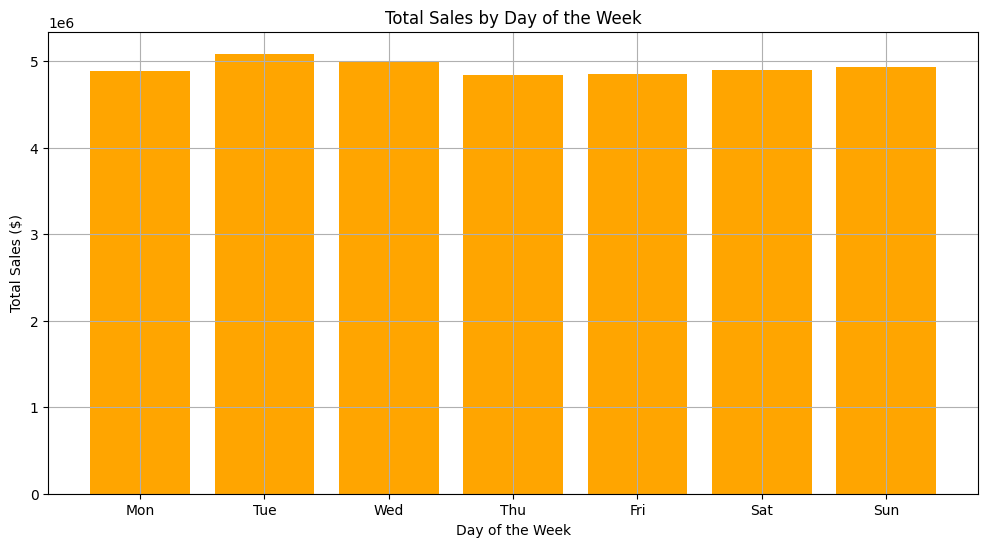

In [ ]:
# Group sales by hour of day
hourly_sales = sales_data.groupby('Hour')['Total Sales'].sum().reset_index()
import seaborn as sns
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(hourly_sales['Hour'], hourly_sales['Total Sales'], marker='o', color='b')
plt.title('Total Sales by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()
# Group sales by day of week
weekly_sales = sales_data.groupby('DayOfWeek')['Total Sales'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(weekly_sales['DayOfWeek'], weekly_sales['Total Sales'], color='orange')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales ($)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-43-24faad002260>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales_Density', y='Category', data=category_sales, palette='viridis')


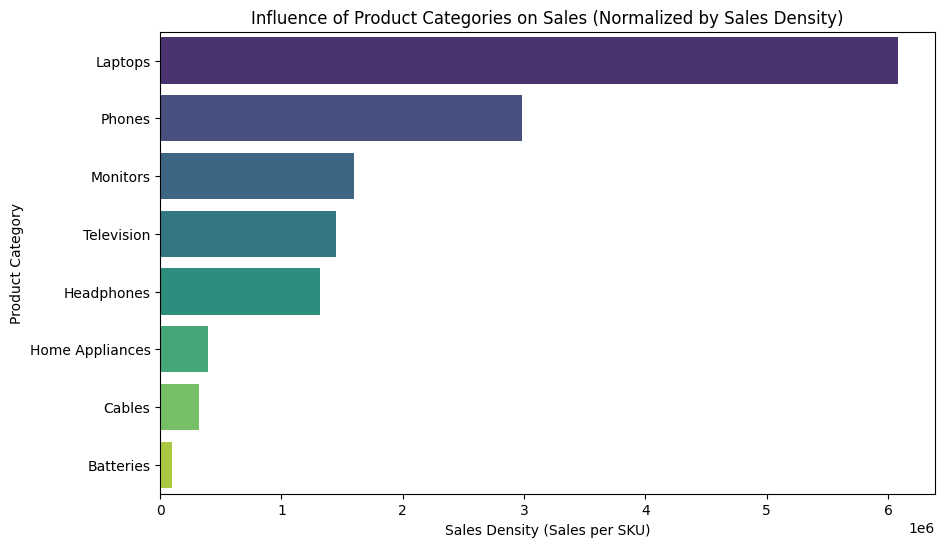

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'sales_data' is the DataFrame with the product and total sales data

# Create a mapping for products to categories
category_mapping = {
    'AAA Batteries (4-pack)': 'Batteries',
    'AA Batteries (4-pack)': 'Batteries',
    'USB-C Charging Cable': 'Cables',
    'Lightning Charging Cable': 'Cables',
    'Wired Headphones': 'Headphones',
    'Apple Airpods Headphones': 'Headphones',
    'Bose SoundSport Headphones': 'Headphones',
    '27in FHD Monitor': 'Monitors',
    '27in 4K Gaming Monitor': 'Monitors',
    '34in Ultrawide Monitor': 'Monitors',
    '20in Monitor': 'Monitors',
    'iPhone': 'Phones',
    'Google Phone': 'Phones',
    'Vareebadd Phone': 'Phones',
    'Macbook Pro Laptop': 'Laptops',
    'ThinkPad Laptop': 'Laptops',
    'Flatscreen TV': 'Television',
    'LG Washing Machine': 'Home Appliances',
    'LG Dryer': 'Home Appliances'
}

# Map products to categories
sales_data['Category'] = sales_data['Product'].map(category_mapping)

# Group by Category and calculate total sales and count of SKUs in each category
category_sales = sales_data.groupby('Category').agg(
    Total_Sales=('Total Sales', 'sum'),
    SKU_Count=('Product', 'nunique')
).reset_index()

# Calculate Sales Density (Total Sales / Number of SKUs)
category_sales['Sales_Density'] = category_sales['Total_Sales'] / category_sales['SKU_Count']

# Sort the data by Sales Density for better visualization
category_sales = category_sales.sort_values(by='Sales_Density', ascending=False)

# Plot the bar chart to show the normalized sales (Sales Density) for each category
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales_Density', y='Category', data=category_sales, palette='viridis')
plt.title('Influence of Product Categories on Sales (Normalized by Sales Density)')
plt.xlabel('Sales Density (Sales per SKU)')
plt.ylabel('Product Category')
plt.show()
